In [154]:
#Importing the required Libraries

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [155]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [156]:
#Importing the dataset

leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##Imputing null values

In [157]:
(leads.isnull().sum()/len(leads))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [158]:
leads['Lead Source'].fillna(value='Others',inplace=True)

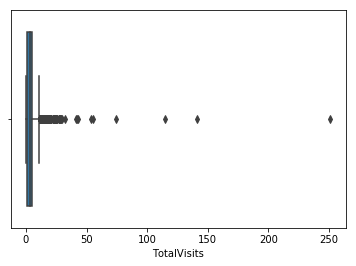

In [159]:
sns.boxplot(leads.TotalVisits)

In [160]:
leads['TotalVisits'].fillna(value=0,inplace=True)

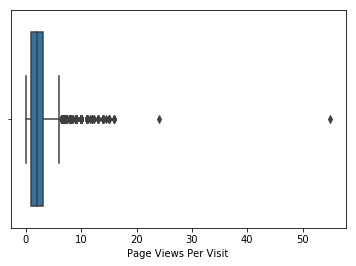

In [161]:
sns.boxplot(leads['Page Views Per Visit'])

In [162]:
leads['Page Views Per Visit'].fillna(value=0,inplace=True)

# Replacing 'Select' with appropriate values

In [163]:
leads['Lead Profile'].replace('Select','Other',inplace=True)
leads['Lead Profile'].fillna(value='Other',inplace=True)

In [164]:
leads['City'].replace('Select','Other',inplace=True)
leads['City'].fillna(value='Other',inplace=True)

In [165]:
leads['Tags'].fillna(value='Other',inplace=True)

In [166]:
print(leads['Lead Quality'].mode())
leads['Lead Quality'].fillna(value='Might be',inplace=True)

0    Might be
dtype: object


In [167]:
leads['What matters most to you in choosing a course'].fillna(value='Other',inplace=True)

In [168]:
leads['What is your current occupation'].replace('Select','Other',inplace=True)
leads['What is your current occupation'].fillna(value='Other',inplace=True)

In [169]:
leads['How did you hear about X Education'].replace('Select','Other',inplace=True)
leads['How did you hear about X Education'].fillna(value='Other',inplace=True)

In [170]:
leads['Specialization'].replace('Select','Other',inplace=True)
leads['Specialization'].fillna(value='Other',inplace=True)

In [171]:
leads['Country'].fillna(value='unknown',inplace=True)

In [172]:
leads['Asymmetrique Activity Index'].replace('02.Medium',2, inplace=True)
leads['Asymmetrique Activity Index'].replace('01.High',1, inplace=True)
leads['Asymmetrique Activity Index'].replace('03.Low',3, inplace=True)

In [173]:
leads['City'].replace('Other','Other Cities',inplace = True)

In [174]:
leads['Asymmetrique Profile Index'].replace('02.Medium',2, inplace=True)
leads['Asymmetrique Profile Index'].replace('01.High',1, inplace=True)
leads['Asymmetrique Profile Index'].replace('03.Low',3, inplace=True)

In [175]:
leads['Asymmetrique Activity Index'].fillna(value=0,inplace=True)
leads['Asymmetrique Profile Index'].fillna(value=0,inplace=True)
leads['Asymmetrique Activity Score'].fillna(value=0,inplace=True)
leads['Asymmetrique Profile Score'].fillna(value=0,inplace=True)

In [176]:
(leads.isnull().sum()/len(leads))*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.000000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.000000
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [177]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other Cities,2.0,2.0,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Other,Other Cities,2.0,2.0,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,2.0,1.0,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Mumbai,2.0,1.0,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Mumbai,2.0,1.0,15.0,18.0,No,No,Modified


# Treating Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x22f81426ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x22f8142f3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f81426978>],
 'medians': [<matplotlib.lines.Line2D at 0x22f8142fc18>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f81439080>],
 'means': []}

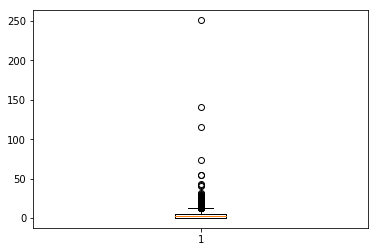

In [178]:
plt.boxplot(leads['TotalVisits'])

In [179]:
Q1 = leads.TotalVisits.quantile(0.05)
Q3 = leads.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads.TotalVisits >= Q1 - 1.5*IQR) & (leads.TotalVisits <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x22f81477e10>,
 'caps': [<matplotlib.lines.Line2D at 0x22f81482710>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f81477cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x22f81482f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f8148c3c8>],
 'means': []}

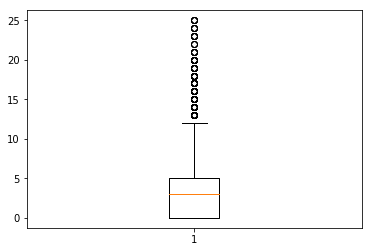

In [180]:
plt.boxplot(leads['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22f816eb080>,
 'caps': [<matplotlib.lines.Line2D at 0x22f816eb940>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f816e0ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x22f816f31d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f816f35f8>],
 'means': []}

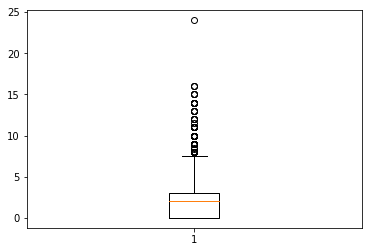

In [181]:
plt.boxplot(leads['Page Views Per Visit'])

In [182]:
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x22f814b3588>,
 'caps': [<matplotlib.lines.Line2D at 0x22f814b3e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f814b3438>],
 'medians': [<matplotlib.lines.Line2D at 0x22f814bd6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f814bdb00>],
 'means': []}

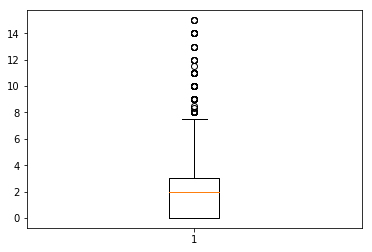

In [183]:
plt.boxplot(leads['Page Views Per Visit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22f815140b8>,
 'caps': [<matplotlib.lines.Line2D at 0x22f81514978>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f81507f28>],
 'medians': [<matplotlib.lines.Line2D at 0x22f8151c208>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f8151c630>],
 'means': []}

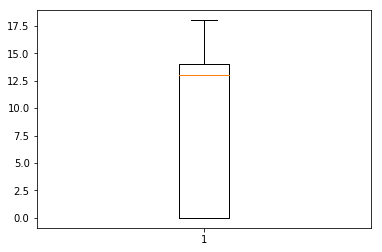

In [184]:
plt.boxplot(leads['Asymmetrique Activity Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22f81565fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f815718d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f81565e80>],
 'medians': [<matplotlib.lines.Line2D at 0x22f81579160>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f81579588>],
 'means': []}

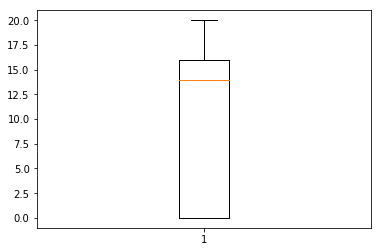

In [185]:
plt.boxplot(leads['Asymmetrique Profile Score'])

In [186]:
leads.shape

(9214, 37)

In [187]:
#prospect id and lead number doesnt affect converted or not
Prospect_ID=leads.pop('Prospect ID')
lead_number = leads['Lead Number']
#lead_number=leads.pop('Lead Number')

In [188]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other Cities,2.0,2.0,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Other,Other Cities,2.0,2.0,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,2.0,1.0,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Mumbai,2.0,1.0,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Mumbai,2.0,1.0,15.0,18.0,No,No,Modified


In [189]:
leads.shape

(9214, 36)

In [190]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000,9214.000000
mean,617204.837421,0.385717,3.267962,487.817018,2.308361,1.037986,0.852399,7.776210,8.885175
std,23411.519823,0.486791,3.292028,548.297370,2.056299,1.013782,0.866120,7.198105,8.250018
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596487.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615504.500000,0.000000,3.000000,248.000000,2.000000,1.000000,1.000000,13.000000,14.000000
75%,637405.500000,1.000000,5.000000,936.000000,3.000000,2.000000,2.000000,14.000000,16.000000
max,660737.000000,1.000000,25.000000,2272.000000,15.000000,3.000000,3.000000,18.000000,20.000000


In [191]:
#Getting the numeric columns for pca
#numeric_columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']
#leads_numeric=leads[numeric_columns]
#leads.drop(columns=numeric_columns,inplace=True)
#leads_numeric.shape


In [192]:
#dropping all single value columns
single_value_columns=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leads.drop(columns=single_value_columns,inplace=True)

In [193]:
#creating dummies for all the categorical columns at once
to_be_dummied_cols=['Do Not Call','Do Not Email','Lead Origin','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Search','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity']
leads=pd.get_dummies(data=leads,columns=to_be_dummied_cols,drop_first=True)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Do Not Call_Yes,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Other,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Lo

### Checking for Missing Values and Inputing Them

In [194]:
# Adding up the missing values (column-wise)
leads.isnull().sum()

Lead Number                                                                0
Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
Asymmetrique Activity Score                                                0
Asymmetrique Profile Score                                                 0
Do Not Call_Yes                                                            0
Do Not Email_Yes                                                           0
Lead Origin_Landing Page Submission                                        0
Lead Origin_Lead Add Form                                                  0
Lead Origin_Lead Import                                                    0
Lead Origin_Quick Add Form                                                 0

In [195]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9214 entries, 0 to 9239
Columns: 188 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(3), uint8(181)
memory usage: 2.2 MB


# Test Train Split

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
# Putting feature variable to X
X = leads.drop(['Lead Number','Converted'], axis=1)
X.shape

(9214, 186)

In [198]:
y = leads['Converted']
y.head()
y.shape

(9214,)

In [199]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Sacling

In [200]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Do Not Call_Yes,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Other,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Qu

In [201]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Do Not Call_Yes,Do Not Email_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Other,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Qu

In [202]:
#Converted percentage is
Converted=(y.sum()/len(leads['Converted'].index))*100
Converted

38.571738658563056

#### PCA on the data 

In [203]:
X_train.shape

(6449, 186)

In [204]:
from sklearn.decomposition import PCA

In [205]:
pca = PCA(random_state=42)

In [206]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

#### Components of the PCA

In [207]:
pca.components_

array([[ 4.88040479e-01,  3.58475110e-01,  5.06237346e-01, ...,
         1.05874360e-03,  1.74076277e-04,  3.53169183e-05],
       [ 9.66530494e-02,  7.54337961e-02,  1.27546397e-01, ...,
        -1.11889741e-03,  2.63470279e-04,  1.22306763e-04],
       [ 3.04772540e-01, -3.02032348e-01,  2.78175878e-01, ...,
        -1.36426651e-04, -2.26777701e-04,  2.63319542e-05],
       ...,
       [ 0.00000000e+00, -3.57591232e-18,  1.14258200e-17, ...,
        -7.93635990e-17,  9.10729825e-17, -1.13624388e-16],
       [ 0.00000000e+00, -8.80292522e-18, -8.47845158e-18, ...,
         1.48318857e-16,  1.90819582e-17,  2.77555756e-17],
       [-0.00000000e+00,  1.21430643e-16,  5.23568552e-17, ...,
        -1.76941795e-16, -4.02455846e-16, -1.56125113e-16]])

In [208]:
#Checking explained variance ratio
pca.explained_variance_ratio_

array([2.05726735e-01, 1.74658720e-01, 7.93552546e-02, 5.98280449e-02,
       4.68145380e-02, 4.33934829e-02, 3.36510665e-02, 3.13712864e-02,
       2.95929759e-02, 2.26576791e-02, 1.68511229e-02, 1.60668588e-02,
       1.44756198e-02, 1.11022278e-02, 9.79650011e-03, 9.56101190e-03,
       9.35899255e-03, 8.63232377e-03, 8.24906609e-03, 7.75776622e-03,
       7.52187905e-03, 7.40903509e-03, 7.14432331e-03, 6.46700272e-03,
       6.13398175e-03, 5.52901054e-03, 5.50306988e-03, 5.18306265e-03,
       4.85603280e-03, 4.65259294e-03, 4.48493389e-03, 4.24590160e-03,
       4.19448850e-03, 3.98956212e-03, 3.83510224e-03, 3.67000488e-03,
       3.39333566e-03, 3.26377121e-03, 3.24325103e-03, 3.09993780e-03,
       2.94703370e-03, 2.82002524e-03, 2.79364530e-03, 2.66416994e-03,
       2.36412636e-03, 2.27489990e-03, 2.25293137e-03, 2.02737418e-03,
       1.91156260e-03, 1.82324980e-03, 1.69689290e-03, 1.63032035e-03,
       1.58697495e-03, 1.52757537e-03, 1.48228059e-03, 1.47764057e-03,
      

In [209]:
#Making the Scree Plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)

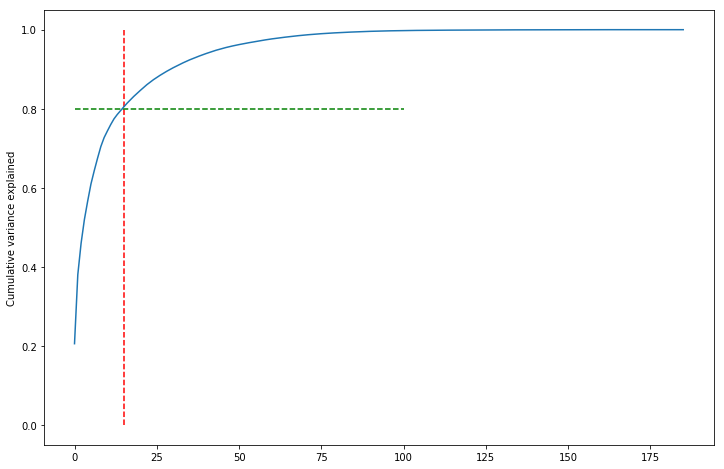

In [210]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.8, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [211]:
#Perform PCA with 15 components to cover 95% of variance.
from sklearn.decomposition import IncrementalPCA

In [212]:
pca_final = IncrementalPCA(n_components=15)

In [213]:
df_train_pca = pca_final.fit_transform(X_train)

In [214]:
df_train_pca.shape

(6449, 15)

In [215]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [216]:
corrmat.shape

(15, 15)

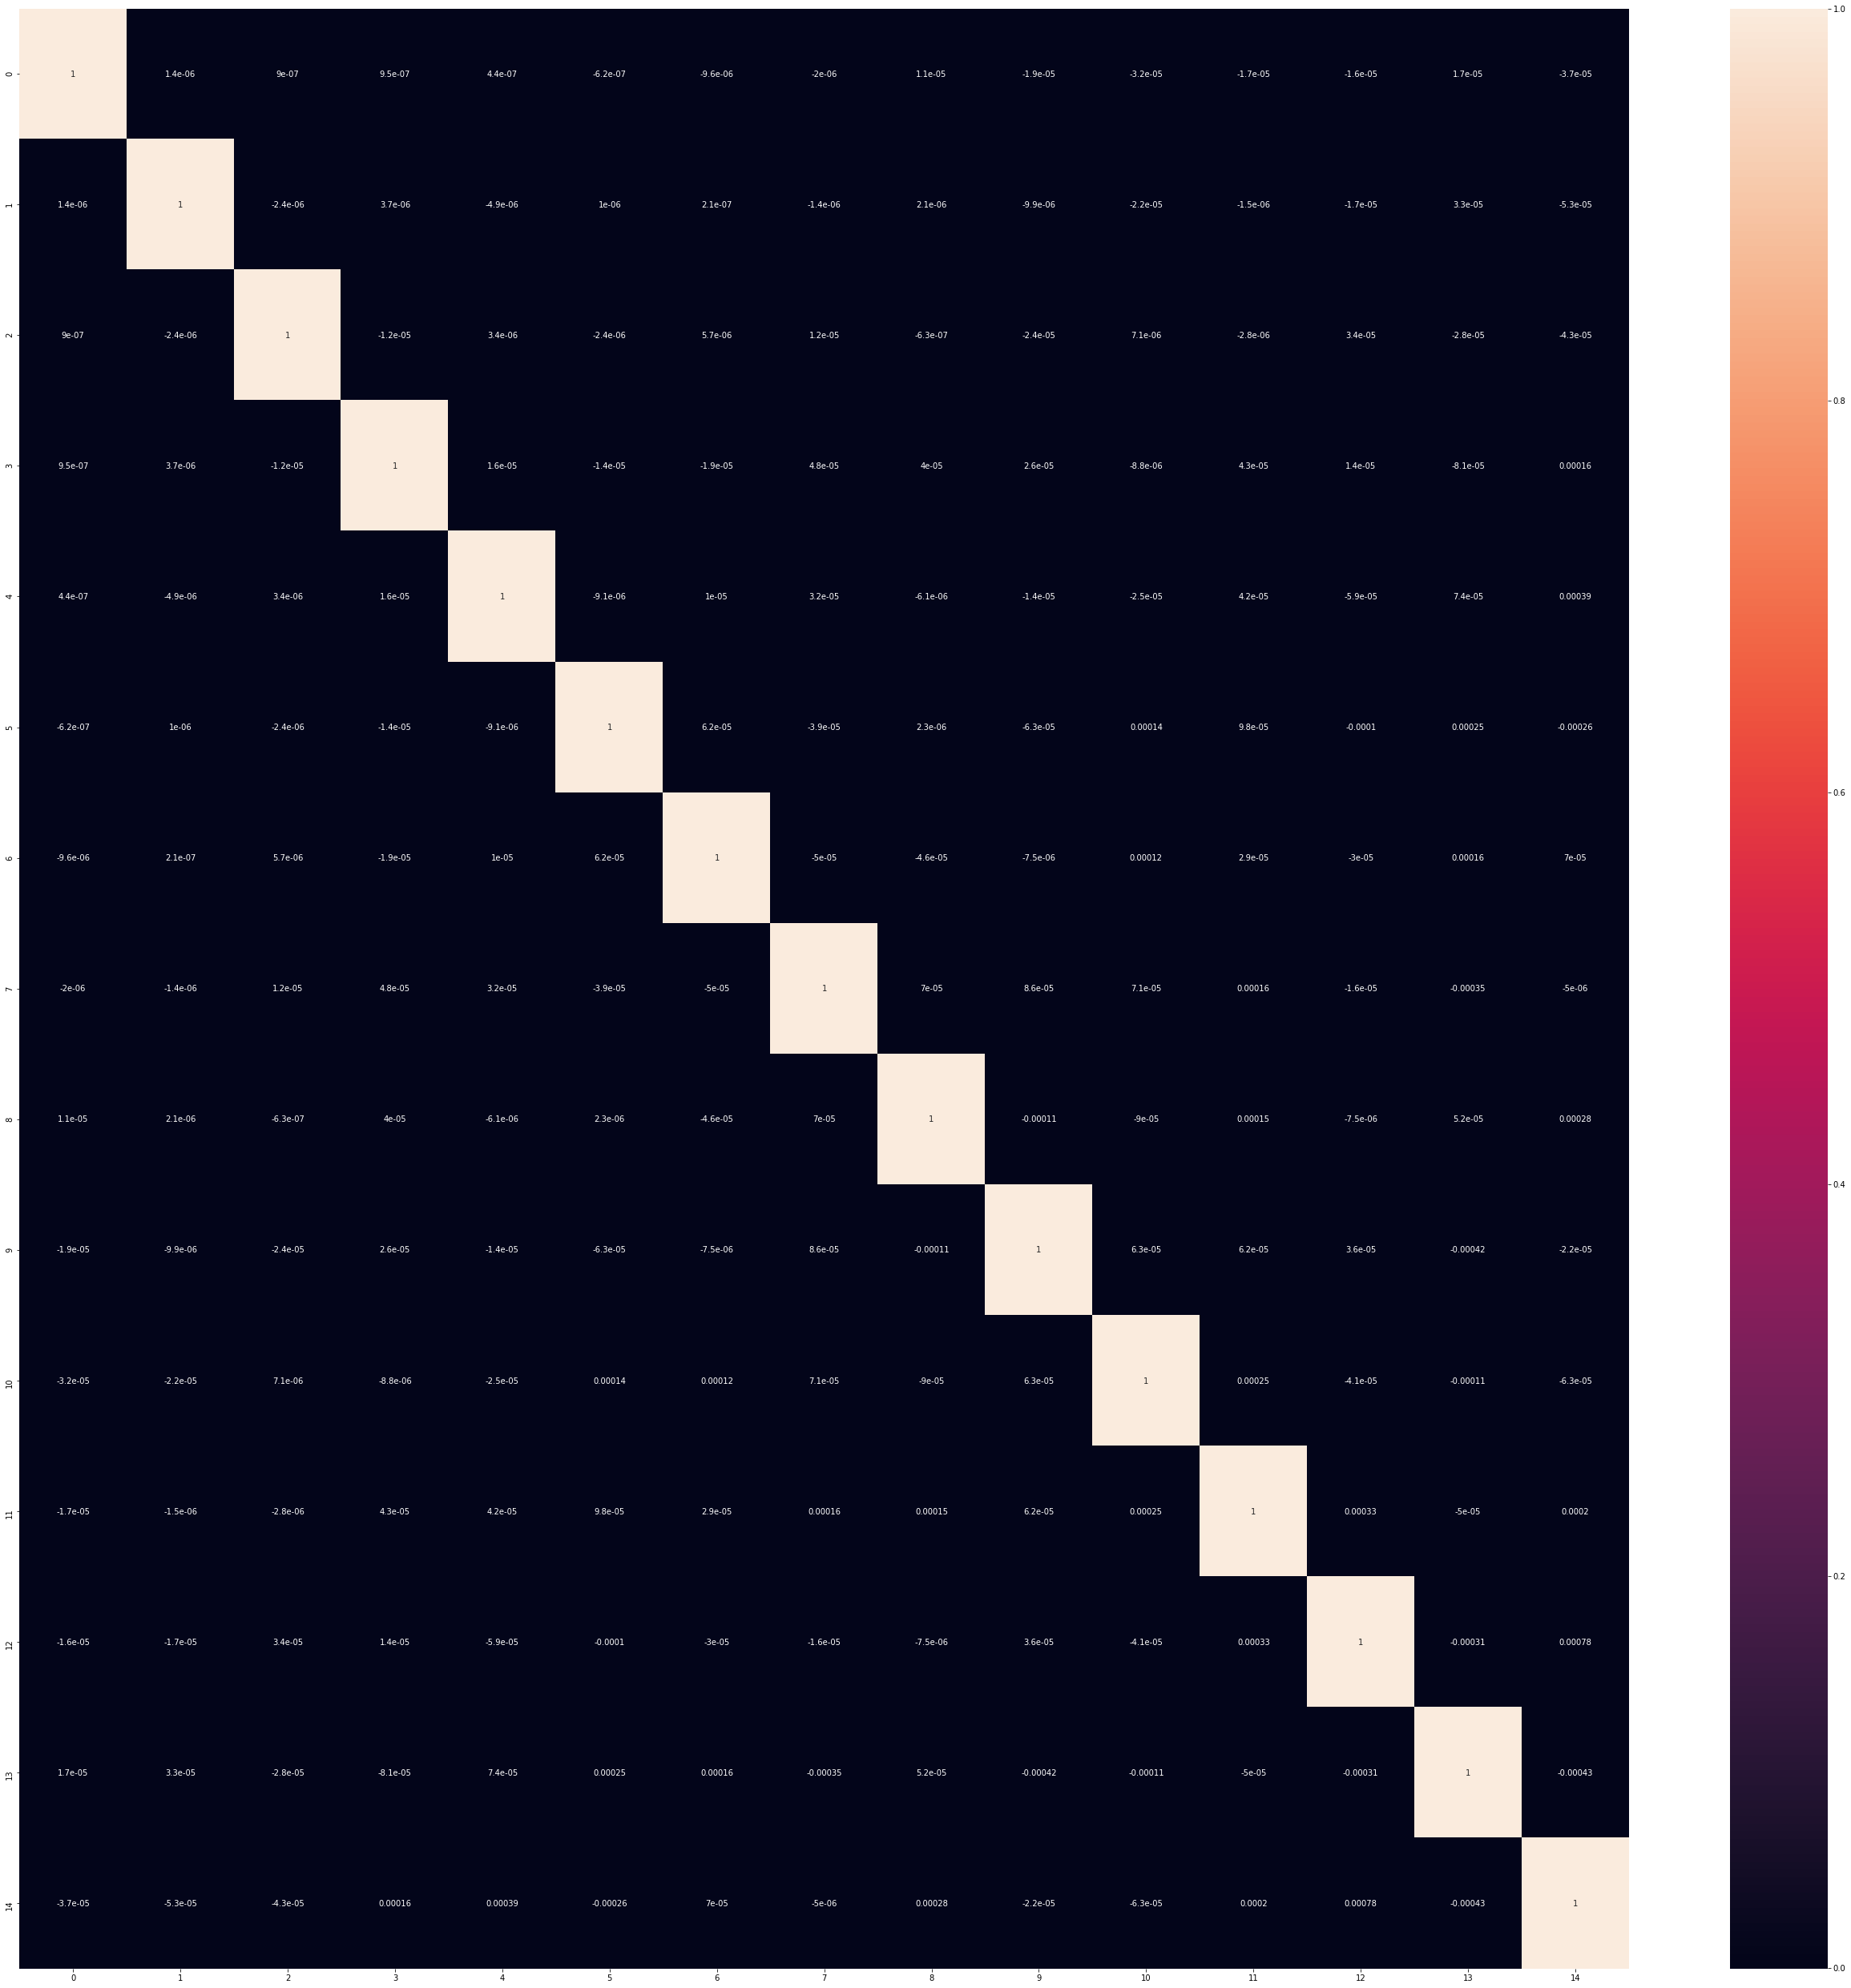

In [217]:
#Plotting the heatmap of the corr matrix
plt.figure(figsize=[45,45])
sns.heatmap(corrmat, annot=True)

In [218]:
#Applying the transformation on the test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2765, 15)

#### Applying logistic regression on the data on our Principal components

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [220]:
learner_pca = LogisticRegression()

In [221]:
model_pca = learner_pca.fit(df_train_pca, y_train)

#### Making predictions on the test set

In [222]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [223]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.52'

In [224]:
pca_again = PCA(0.9)

In [225]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [226]:
df_train_pca2.shape

(6449, 31)

In [227]:
#logistic regression model

In [228]:
learner_pca2 = LogisticRegression()

In [229]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [230]:
df_test_pca2 = pca_again.transform(X_test)

In [231]:
df_test_pca2.shape

(2765, 31)

In [232]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [233]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.52'

### Creating a logical regression model with all the columns

In [234]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                          169
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 16 Nov 2019   Deviance:                          nan
Time:                        01:20:48   Pearson chi2:                 2.04e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.096e+16   1.23e+08   8.94e+07      0.000     1.1e+16     1.1e+16
TotalVisits                                                              4.592e+13   1.32e+06   3.49e+07      0.000    4.59e+13    4.59e+13
Total Time Spent on Website                                              1.549e+14   1.05e+06   1.48e+08      0.000    1.55e+14    1.55e+14
Page Views Per Visit                                                    -2.721e+13    1.4e+06  -1.94e+07      0.000   -2.72e+13   -2.72e+13
Asymmetrique Activity Score                                              1.595e+15   1.26e+07   1.27e+08      0.000    1.59e+15    1.59e+15
Asymmetrique Profile Score                                              -3.422e+14    1.4e+07  -2.44e+07      0.000   -3.42e+14   -3.42e+14
Do Not Call_Yes                                                          3.461e+15    4.8e+07   7.21e+07      0.000    3.46e+15    3.46e+15
Do Not Email_Yes                                                        -1.367e+14   4.46e+06  -3.07e+07      0.000   -1.37e+14   -1.37e+14
Lead Origin_Landing Page Submission                                     -1.329e+14   4.27e+06  -3.11e+07      0.000   -1.33e+14   -1.33e+14
Lead Origin_Lead Add Form                                               -3.848e+15   4.83e+07  -7.97e+07      0.000   -3.85e+15   -3.85e+15
Lead Origin_Lead Import                                                  7.584e+15   7.18e+07   1.06e+08      0.000    7.58e+15    7.58e+15
Lead Origin_Quick Add Form                                                -72.3901   6.26e-06  -1.16e+07      0.000     -72.390     -72.390
Lead Source_Direct Traffic                                              -5.386e+15   6.29e+07  -8.57e+07      0.000   -5.39e+15   -5.39e+15
Lead Source_Facebook                                                    -1.363e+16   9.44e+07  -1.44e+08      0.000   -1.36e+16   -1.36e+16
Lead Source_Google                                                       -5.41e+15   6.28e+07  -8.61e+07      0.000   -5.41e+15   -5.41e+15
Lead Source_Live Chat                                                   -2.852e+14   7.86e+07  -3.63e+06      0.000   -2.85e+14   -2.85e+14
Lead Source_NC_EDM                                                       8.056e+13   9.28e+07   8.68e+05      0.000    8.06e+13    8.06e+13
Lead Source_Olark Chat                                                  -5.417e+15    6.3e+07   -8.6e+07      0.000   -5.42e+15   -5.42e+15
Lead Source_Organic Search                                              -5.368e+15   6.29e+07  -8.54e+07      0.000   -5.37e+15   -5.37e+15
Lead Source_Others                                                      -2.035e+15

In [235]:
logreg = LogisticRegression()

#### Running RFE with 15 variables

In [236]:
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [237]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True,

In [238]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 78),
 ('Total Time Spent on Website', False, 16),
 ('Page Views Per Visit', False, 106),
 ('Asymmetrique Activity Score', False, 9),
 ('Asymmetrique Profile Score', False, 10),
 ('Do Not Call_Yes', False, 101),
 ('Do Not Email_Yes', False, 26),
 ('Lead Origin_Landing Page Submission', False, 64),
 ('Lead Origin_Lead Add Form', False, 37),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Origin_Quick Add Form', False, 167),
 ('Lead Source_Direct Traffic', False, 141),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 143),
 ('Lead Source_Live Chat', False, 152),
 ('Lead Source_NC_EDM', False, 28),
 ('Lead Source_Olark Chat', False, 137),
 ('Lead Source_Organic Search', False, 105),
 ('Lead Source_Others', False, 142),
 ('Lead Source_Pay per Click Ads', False, 155),
 ('Lead Source_Press_Release', False, 160),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Social Media', False, 110),
 ('Lead Sourc

In [239]:
col = X_train.columns[rfe.support_]

In [240]:
X_train.columns[rfe.support_]

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'What matters most to you in choosing a course_Other', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Worst', 'Asymmetrique Activity Index_3.0', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation'], dtype='object')

#### Creating a logistic regression model with the variables that support the model

In [241]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1221.7
Date:                Sat, 16 Nov 2019   Deviance:                       2443.4
Time:                        01:20:54   Pearson chi2:                 7.86e+03
No. Iterations:                    22   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.7905      0.204    -13.650      0.000      -3.191      -2.390
Lead Source_Welingak Website                            3.3456      1.032      3.241      0.001       1.322       5.369
Last Activity_SMS Sent                                  2.1917      0.123     17.843      0.000       1.951       2.432
What matters most to you in choosing a course_Other    -2.7909      0.152    -18.320      0.000      -3.089      -2.492
Tags_Busy                                               2.2688      0.290      7.825      0.000       1.700       2.837
Tags_Closed by Horizzon                                 9.3940      1.026      9.160      0.000       7.384      11.404
Tags_Lost to EINS                                       9.6466      0.677     14.255      0.000       8.320      10.973
Tags_Other                                              3.4711      0.233     14.889      0.000       3.014       3.928
Tags_Ringing                                           -1.7898      0.290     -6.174      0.000      -2.358      -1.222
Tags_Will revert after reading the email                6.1169      0.253     24.195      0.000       5.621       6.612
Tags_switched off                                      -2.5140      0.624     -4.027      0.000      -3.738      -1.290
Tags_wrong number given                               -21.3528   1.27e+04     -0.002      0.999    -2.5e+04    2.49e+04
Lead Quality_Worst                                     -2.0862      0.648     -3.221      0.001      -3.355      -0.817
Asymmetrique Activity Index_3.0                        -1.9271      0.407     -4.736      0.000      -2.725      -1.130
Last Notable Activity_Modified                         -1.5296      0.125    -12.258      0.000      -1.774      -1.285
Last Notable Activity_Olark Chat Conversation          -1.6771      0.433     -3.871      0.000      -2.526      -0.828
=======================================================================================================================
"""

In [242]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2178    0.190283
2924    0.993781
9108    0.084048
7926    0.025584
7870    0.663882
7615    0.010148
2718    0.002216
500     0.019490
8328    0.022154
505     0.965324
dtype: float64

In [243]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19028283, 0.99378134, 0.08404781, 0.02558397, 0.66388166,
       0.01014801, 0.00221586, 0.01948951, 0.02215439, 0.96532436])

#### Checking the VIF values of the variables

In [244]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.12
5,Tags_Lost to EINS,1.07
14,Last Notable Activity_Olark Chat Conversation,1.05
3,Tags_Busy,1.04
9,Tags_switched off,1.04
12,Asymmetrique Activity Index_3.0,1.04
10,Tags_wrong number given,1.01
11,Lead Quality_Worst,0.45
2,What matters most to you in choosing a course_...,0.18
8,Tags_Will revert after reading the email,0.17


In [245]:
y_train.head()

2178    0
2924    1
9108    0
7926    0
7870    0
Name: Converted, dtype: int64

In [246]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = leads['Lead Number']
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.190283,660737.0
1,1,0.993781,660728.0
2,0,0.084048,660727.0
3,0,0.025584,660719.0
4,0,0.663882,660681.0


In [247]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.190283,660737.0,0
1,1,0.993781,660728.0,1
2,0,0.084048,660727.0,0
3,0,0.025584,660719.0,0
4,0,0.663882,660681.0,0


Checking the confision metrics and the accuracy

In [248]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3836   83]
 [ 471 2059]]


In [249]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9140952085594666


Dropping the column 'Tags_wrong number given' as it had high p-value

In [250]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'What matters most to you in choosing a course_Other', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Worst', 'Asymmetrique Activity Index_3.0', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation'], dtype='object')

Re-running the model after dropping the variable with high p-value

In [251]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1225.1
Date:                Sat, 16 Nov 2019   Deviance:                       2450.2
Time:                        01:20:54   Pearson chi2:                 7.82e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.8915      0.205    -14.107      0.000      -3.293      -2.490
Lead Source_Welingak Website                            3.3425      1.032      3.238      0.001       1.320       5.365
Last Activity_SMS Sent                                  2.1720      0.122     17.768      0.000       1.932       2.412
What matters most to you in choosing a course_Other    -2.7846      0.152    -18.324      0.000      -3.082      -2.487
Tags_Busy                                               2.3784      0.289      8.228      0.000       1.812       2.945
Tags_Closed by Horizzon                                 9.4883      1.026      9.249      0.000       7.478      11.499
Tags_Lost to EINS                                       9.7327      0.677     14.374      0.000       8.406      11.060
Tags_Other                                              3.5731      0.233     15.312      0.000       3.116       4.030
Tags_Ringing                                           -1.6727      0.288     -5.799      0.000      -2.238      -1.107
Tags_Will revert after reading the email                6.2160      0.253     24.534      0.000       5.719       6.713
Tags_switched off                                      -2.3958      0.623     -3.843      0.000      -3.618      -1.174
Lead Quality_Worst                                     -2.0479      0.649     -3.155      0.002      -3.320      -0.776
Asymmetrique Activity Index_3.0                        -1.9326      0.406     -4.761      0.000      -2.728      -1.137
Last Notable Activity_Modified                         -1.5213      0.125    -12.200      0.000      -1.766      -1.277
Last Notable Activity_Olark Chat Conversation          -1.6768      0.433     -3.871      0.000      -2.526      -0.828
=======================================================================================================================
"""

In [252]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [253]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [254]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.189642,660737.0,0
1,1,0.993791,660728.0,1
2,0,0.083770,660727.0,0
3,0,0.025975,660719.0,0
4,0,0.664099,660681.0,0


### Checking the overall accuracy of the model on the train set

In [255]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9140952085594666


#### Checking the VIF values in the final model

In [256]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.12
5,Tags_Lost to EINS,1.07
13,Last Notable Activity_Olark Chat Conversation,1.05
3,Tags_Busy,1.04
9,Tags_switched off,1.04
11,Asymmetrique Activity Index_3.0,1.04
10,Lead Quality_Worst,0.45
2,What matters most to you in choosing a course_...,0.18
8,Tags_Will revert after reading the email,0.17
1,Last Activity_SMS Sent,0.12


### Drawing the AUC-ROC Curve

In [257]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [258]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

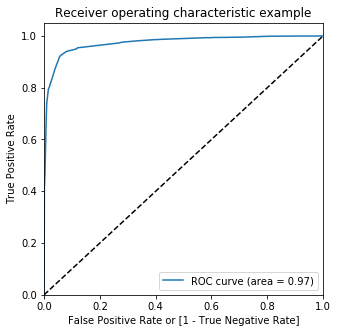

In [259]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Calculating Log Loss

In [260]:
ll=metrics.log_loss(y_train_pred_final.Converted,y_train_pred_final.predicted)
ll

2.967056673804811

### Calculating mean squared error

In [261]:
mse=metrics.mean_squared_error(y_train_pred_final.Converted,y_train_pred_final.predicted)
mse

0.08590479144053341

## Making Predictions on the test set

### Scaling the numeric variables

In [262]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

#### Taking only those colunmns needed by the model

In [263]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Asymmetrique Activity Index_3.0,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
2729,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5463,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6476,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4135,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5408,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [264]:
#Adding a constant to X
X_test_sm = sm.add_constant(X_test)

In [265]:
#Predict Y
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2729    0.995916
5463    0.664099
6476    0.010311
4135    0.965262
5408    0.995916
2681    0.995916
2271    0.945504
2659    0.965262
3186    0.945504
8213    0.993791
dtype: float64

In [266]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
2729,0.995916
5463,0.664099
6476,0.010311
4135,0.965262
5408,0.995916


In [267]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [268]:
y_test_df.index

Int64Index([2729, 5463, 6476, 4135, 5408, 2681, 2271, 2659, 3186, 8213,
            ...
            3412, 8178, 4673, 4322, 8816, 1051, 8706, 7173, 6151, 3069], dtype='int64', length=2765)

In [269]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [270]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [271]:
y_pred_final.head()

,Converted,0
0,1,0.995916
1,0,0.664099
2,0,0.010311
3,1,0.965262
4,1,0.995916


In [272]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [273]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Converted','Converted_Prob'], axis=1)

In [274]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.995916
1,0,0.664099
2,0,0.010311
3,1,0.965262
4,1,0.995916


In [275]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

In [276]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.995916,1
1,0,0.664099,0
2,0,0.010311,0
3,1,0.965262,1
4,1,0.995916,1


In [277]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9193490054249548

In [279]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1710,   31],
       [ 192,  832]], dtype=int64)